In [ ]:
'''

You need to create a tool (an analysis notebook) that analyzes and visualizes the major metrics of the
portfolios across all of these areas, and determine which portfolio outperformed the others. You will be 
given the historical daily returns of several portfolios: some from the firm's algorithmic portfolios, 
some that represent the portfolios of famous "whale" investors like Warren Buffett, and some from the big 
hedge and mutual funds. You will then use this analysis to create a custom portfolio of stocks and compare 
its performance to that of the other portfolios, as well as the larger market.

'''

In [2]:
import pandas as pd
import csv
import seaborn as sns
import datetime as dt
from pathlib import Path
%matplotlib inline

In [3]:
### Prepare the Data

#  First, read and clean several CSV files for analysis. The CSV files include whale portfolio returns, algorithmic 
#  trading portfolio returns, and S&P 500 historical prices. Use the [Whale Analysis Starter Code](Starter_Code/whale_analysis.ipynb) 
#  to complete the following steps:

#  1. Use Pandas to read the following CSV files as a DataFrame. Be sure to convert the dates to a `DateTimeIndex`.

#    * `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

#    * `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

#    * `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

#  2. Detect and remove null values.

#  3. If any columns have dollar signs or characters other than numeric values, remove those characters and convert the data types as needed.

#  4. The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P 500 CSV file contains closing prices. Convert 
#  the S&P 500 closing prices to daily returns.

#  5. Join `Whale Returns`, `Algorithmic Returns`, and the `S&P 500 Returns` into a single DataFrame with columns for each portfolio's returns.

#    ![returns-dataframe.png](Images/returns-dataframe.png)

### Conduct Quantitative Analysis

# Analyze the data to see if any of the portfolios outperform the stock market (i.e., the S&P 500).

#### Performance Analysis

# 1. Calculate and plot daily returns of all portfolios.

# 2. Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P 500?

#### Risk Analysis

# 1. Create a box plot for each of the returns. 

# 2. Calculate the standard deviation for each portfolio. 

# 3. Determine which portfolios are riskier than the S&P 500.

# 4. Calculate the Annualized Standard Deviation.

#### Rolling Statistics

# 1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.

# 2. Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P 500.

# 3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500.

#### Rolling Statistics Challenge: Exponentially Weighted Average

# An alternative method to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

### Sharpe Ratios

# Investment managers and their institutional investors look at the return-to-risk ratio, not just the returns. After all, if you have two portfolios that each offer a 10% return, yet one is lower risk, you would invest in the lower-risk portfolio, right?

# 1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.

# 2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

### Create a Custom Portfolio

# Harold is ecstatic that you were able to help him prove that the algorithmic trading portfolios are doing so well compared to the market and whales portfolios. However, now you are wondering whether you can choose your own portfolio that performs just as well as the algorithmic portfolios. Investigate by doing the following:

# 1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the built-in Google Finance function to choose 3-5 stocks for your portfolio.

# 2. Download the data as CSV files and calculate the portfolio returns.

# 3. Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.

# 4. Add your portfolio returns to the DataFrame with the other portfolios.

# 5. Run the following analyses:

#    * Calculate the Annualized Standard Deviation.
#    * Calculate and plot rolling `std` with a 21-day window.
#    * Calculate and plot the correlation.
#    * Calculate and plot beta for your portfolio compared to the S&P 60 TSX.
#    * Calculate the Sharpe ratios and generate a bar plot.

#4. How does your portfolio do?

# ---

## Resources

# * [Pandas API Docs](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

# * [Exponential weighted function in Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)

# * [`GOOGLEFINANCE` function help](https://support.google.com/docs/answer/3093281)

# * [Supplemental Guide: Fetching Stock Data Using Google Sheets](../../../01-Lesson-Plans/04-Pandas/Supplemental/googlefinance_guide.md)

# ---

## Hints

# * After reading each CSV file, don't forget to sort each DataFrame in ascending order by the Date using `sort_index`. This is especially important when working with time series data, as we want to make sure Date indexes go from earliest to latest.

# * The Pandas functions used in class this week will be useful for this assignment.

# * Be sure to use `head()` or `tail()` when you want to look at your data, but don't want to print to a large DataFrame.

# ---

## Submission

# 1. Use the provided starter Jupyter Notebook to house the code for your data preparation, analysis, and visualizations. Put any analysis or answers to assignment questions in raw text (markdown) cells in the report.

# 2. Submit your notebook to a new GitHub repository.

# 3. Add the URL of your GitHub repository to your assignment when submitting via Bootcamp Spot.

# ---

# © 2020 Trilogy Education Services, a 2U, Inc. brand. All Rights Reserved.


In [ ]:
#  1. Use Pandas to read the following CSV files as a DataFrame. Be sure to convert the dates to a `DateTimeIndex`.

#    * `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

#    * `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

#    * `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

whale_path = Path(r"~/OneDrive/Documents/fintech/fintechfiles/Real_GitLab_Repository/week_4/week4_HW/Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_values(by='Date', ascending=True, inplace=True)
whale_df.head()

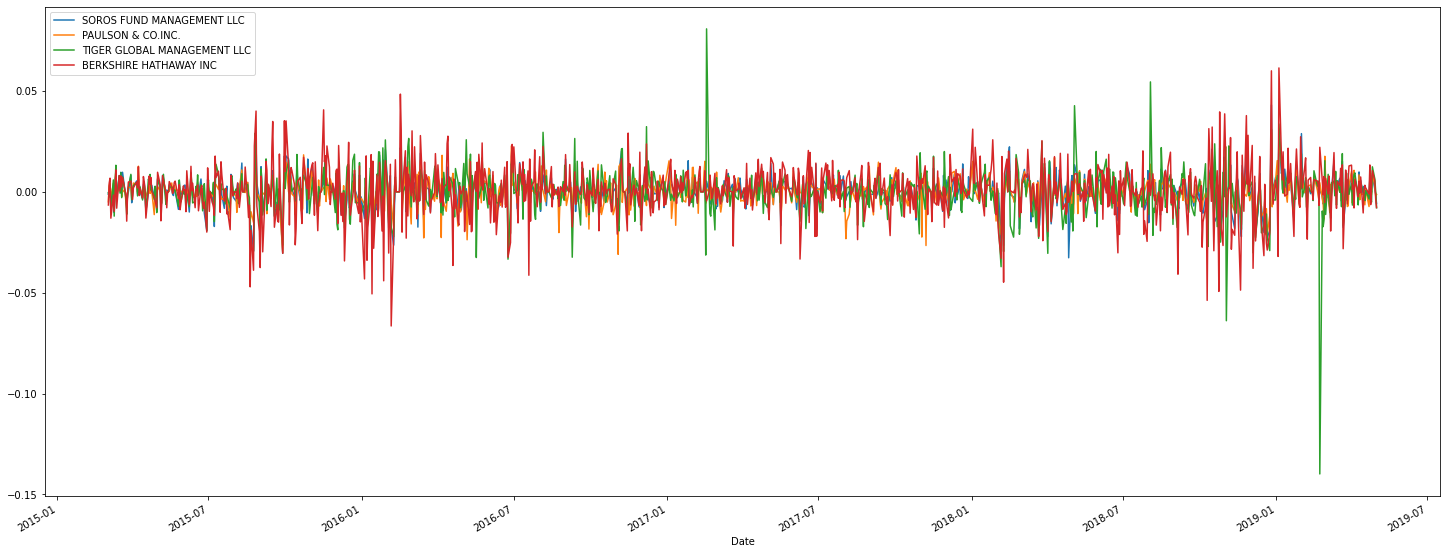

In [31]:
# Plot DataFrame
whale = whale_df.plot(figsize=(25,10))

In [4]:
algo_path = Path(r"~/OneDrive/Documents/fintech/fintechfiles/Real_GitLab_Repository/week_4/week4_HW/Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_values(by='Date', ascending=True, inplace=True)
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


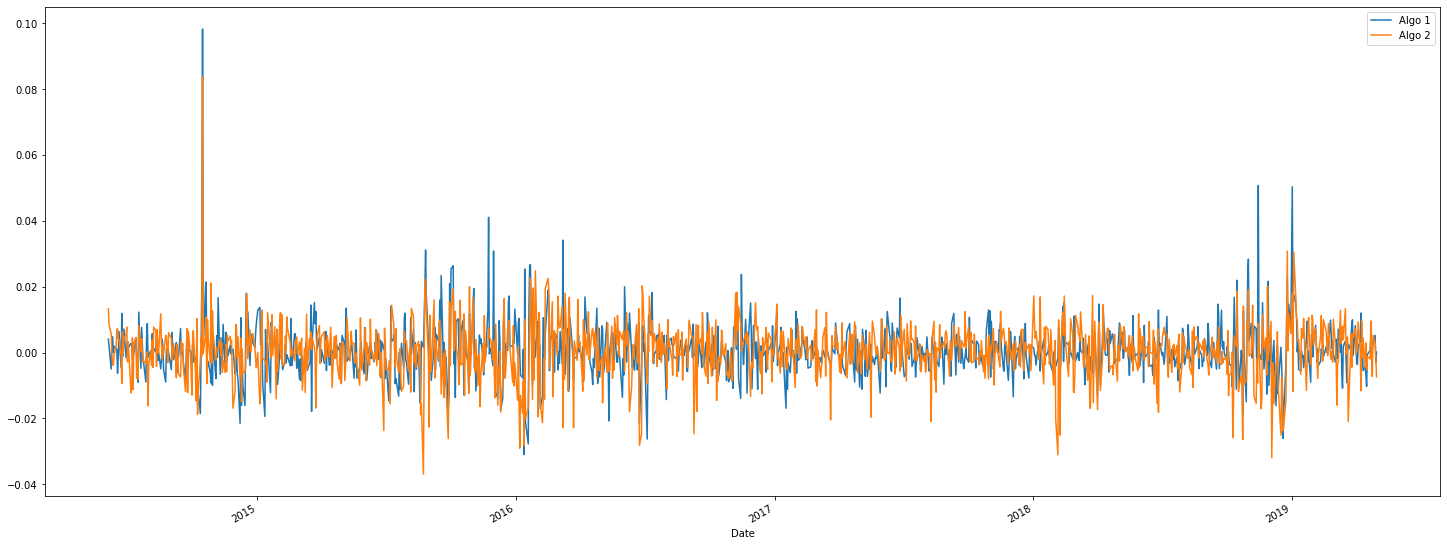

In [33]:
algo = algo_df.plot(figsize=(25,10))

In [5]:
sp500_path = Path(r"~/OneDrive/Documents/fintech/fintechfiles/Real_GitLab_Repository/week_4/week4_HW/Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_values(by='Date', ascending=True, inplace=True)
sp500_df.rename(columns={"Close":"S&P 500"}, inplace=True)
sp500_df.head()

,S&P 500
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [6]:
#  2. Detect and remove null values.

whale_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [7]:
algo_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
sp500_df.dropna()

,S&P 500
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
#  3. If any columns have dollar signs or characters other than numeric values, remove those characters and convert the data types as needed.

sp500_df['S&P 500'] = sp500_df['S&P 500'].str.replace('$', '')
sp500_df['S&P 500']

<ipython-input-9-4c2f02fea553>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['S&P 500'] = sp500_df['S&P 500'].str.replace('$', '')


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: S&P 500, Length: 1649, dtype: object

In [10]:
sp500_df['S&P 500'].dtype

dtype('O')

In [11]:
sp500_df['S&P 500'] = sp500_df['S&P 500'].astype('float')
sp500_df['S&P 500'].dtype

dtype('float64')

In [12]:
sp500_df.head()

,S&P 500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [26]:
#  4. The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P 500 CSV file contains closing prices. Convert 
#  the S&P 500 closing prices to daily returns.
# Calculate the daily return over the last 10 years


sp500_daily_df = sp500_df.pct_change()
sp500_daily_df['S&P 500'] = sp500_daily_return['S&P 500'].astype('float')
sp500_daily_df['S&P 500'].dtype
sp500_daily_df.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


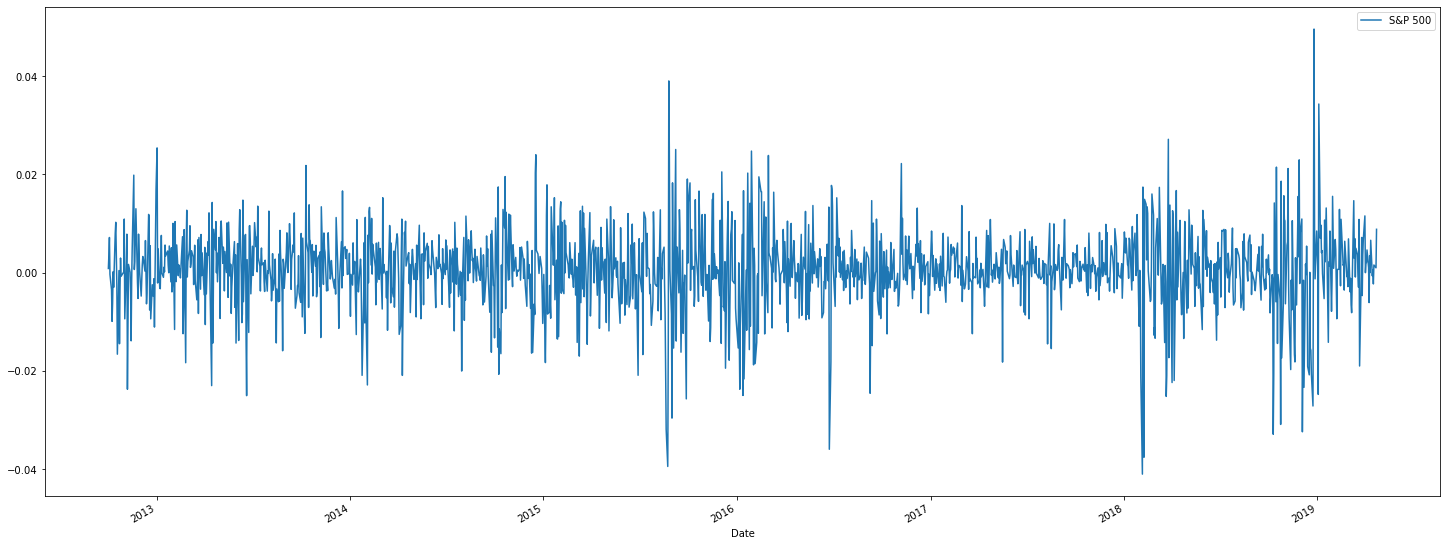

In [34]:
sp500 = sp500_daily_df.plot(figsize=(25,10))

In [29]:
#  5. Join `Whale Returns`, `Algorithmic Returns`, and the `S&P 500 Returns` into a single DataFrame with columns for each portfolio's returns.

portfolio_df = pd.concat([whale_df,algo_df,sp500_daily_df], axis='columns', join='inner')
portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


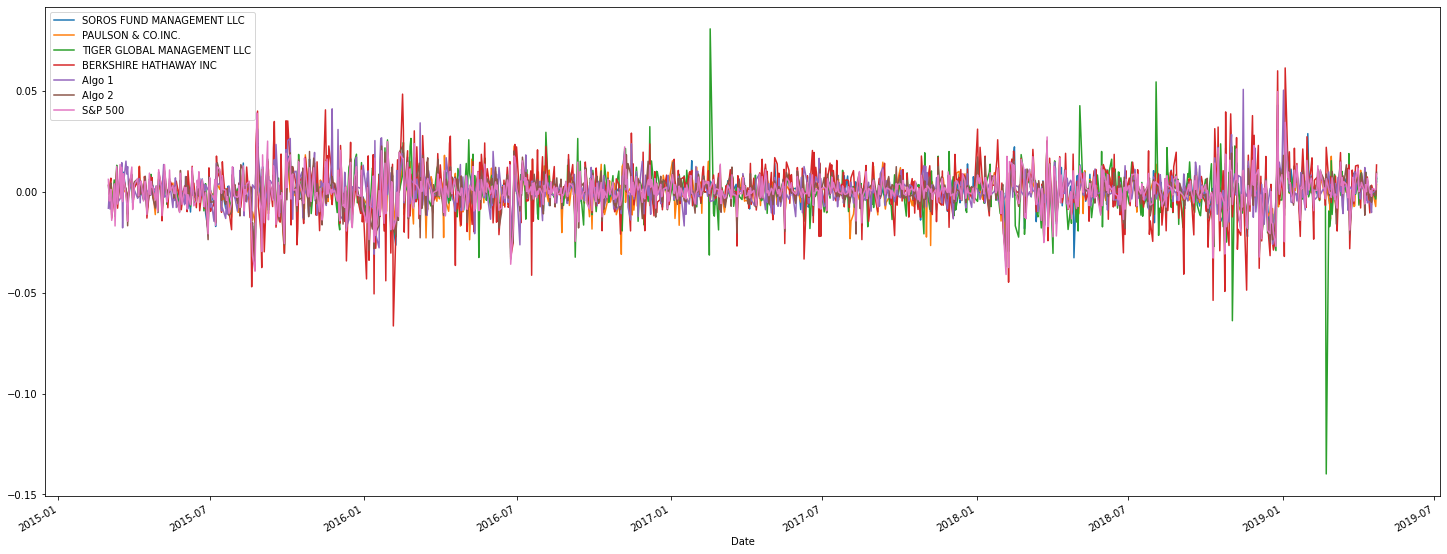

In [35]:
portfolio = portfolio_df.plot(figsize=((25,10)))